## How to use ciso on structured grids

In [1]:
import warnings
import iris


url = "https://tds.marine.rutgers.edu/thredds/dodsC/roms/doppio/2017_da/avg/Averages_Best_Excluding_Day1"

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cubes = iris.load_raw(url)

In [2]:
salt = cubes.extract_cube("sea_water_practical_salinity")[-1, ...]  # Last time step.

lon = salt.coord(axis="X").points
lat = salt.coord(axis="Y").points

In [3]:
p = salt.coord("sea_surface_height_above_reference_ellipsoid").points
q = salt.data

In [4]:
import numpy as np
from ciso import zslice

p0 = -250

isoslice = zslice(q.astype(np.float64), p, p0)

In [5]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER


extent = [lon.min(), lon.max(), lat.min(), lat.max()]

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(9, 13), subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.right_labels = gl.top_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.set_extent(extent)
    ax.coastlines("50m")
    return fig, ax

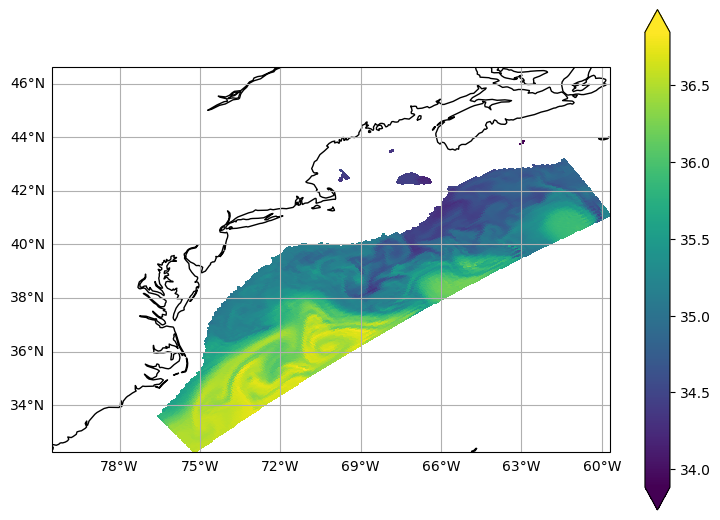

In [6]:
import numpy.ma as ma

fig, ax = make_map()

cs = ax.pcolormesh(lon, lat, ma.masked_invalid(isoslice))

kw = {"shrink": 0.5, "orientation": "vertical", "extend": "both"}
cbar = fig.colorbar(cs, **kw)